In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
# Load the dataset
data = pd.read_csv('./BreastCancerWc.csv')
# Display the initial data
print(data.head())


   1000025  5   1  1.1  1.2  2 1.3  3  1.4  1.5  2.1
0  1002945  5   4    4    5  7  10  3    2    1    2
1  1015425  3   1    1    1  2   2  3    1    1    2
2  1016277  6   8    8    1  3   4  3    7    1    2
3  1017023  4   1    1    3  2   1  3    1    1    2
4  1017122  8  10   10    8  7  10  9    7    1    4


In [60]:
# Rename columns for clarity
data.columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
                'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size',
                'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

print(data.head())


   Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1002945                5                        4   
1             1015425                3                        1   
2             1016277                6                        8   
3             1017023                4                        1   
4             1017122                8                       10   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         4                  5                            7   
1                         1                  1                            2   
2                         8                  1                            3   
3                         1                  3                            2   
4                        10                  8                            7   

  Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0          10                3                2        1

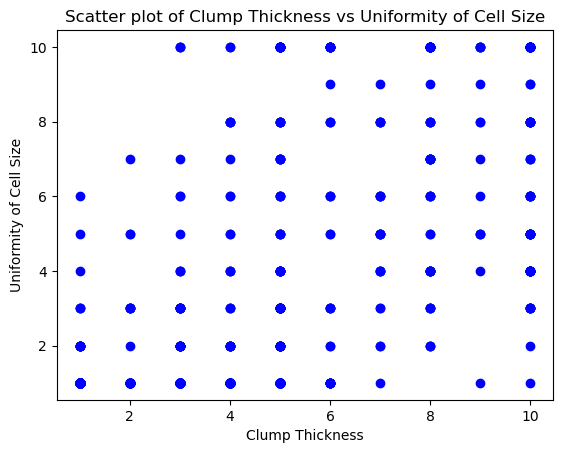

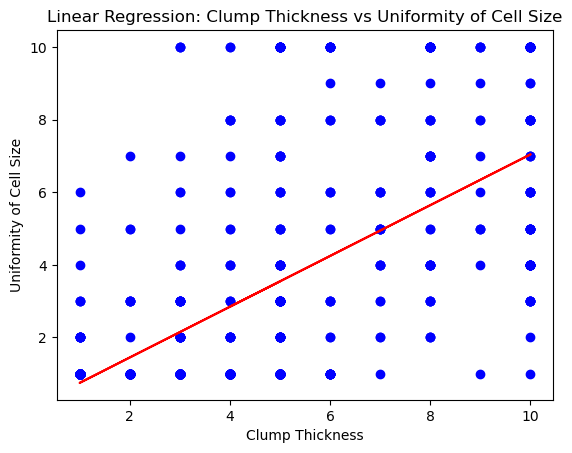

Intercept: 0.049373088839406165
Coefficient: 0.6991688563055772


In [61]:

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
X = data['Clump Thickness'].values.reshape(-1,1)
y = data['Uniformity of Cell Size'].values

# Scatter plot
plt.scatter(X, y, color='blue')
plt.title('Scatter plot of Clump Thickness vs Uniformity of Cell Size')
plt.xlabel('Clump Thickness')
plt.ylabel('Uniformity of Cell Size')
plt.show()

# Fitting the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Plotting the regression line
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title('Linear Regression: Clump Thickness vs Uniformity of Cell Size')
plt.xlabel('Clump Thickness')
plt.ylabel('Uniformity of Cell Size')
plt.show()

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           698 non-null    int64 
 1   Clump Thickness              698 non-null    int64 
 2   Uniformity of Cell Size      698 non-null    int64 
 3   Uniformity of Cell Shape     698 non-null    int64 
 4   Marginal Adhesion            698 non-null    int64 
 5   Single Epithelial Cell Size  698 non-null    int64 
 6   Bare Nuclei                  698 non-null    object
 7   Bland Chromatin              698 non-null    int64 
 8   Normal Nucleoli              698 non-null    int64 
 9   Mitoses                      698 non-null    int64 
 10  Class                        698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [63]:
data.isna().sum().sum()

0

In [64]:
(data.values == np.NaN).sum()

0

In [65]:
data.shape

(698, 11)

In [66]:
# Remove NA values
data.dropna(inplace=True)

# Remove '?' values
data = data[data != '?'].dropna()

# Remove negative values
for col in data.select_dtypes(include=np.number).columns:
    data[col] = data[col].apply(lambda x: np.nan if x < 0 else x)

data.dropna(inplace=True)

print(data.head())


   Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1002945                5                        4   
1             1015425                3                        1   
2             1016277                6                        8   
3             1017023                4                        1   
4             1017122                8                       10   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         4                  5                            7   
1                         1                  1                            2   
2                         8                  1                            3   
3                         1                  3                            2   
4                        10                  8                            7   

  Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0          10                3                2        1

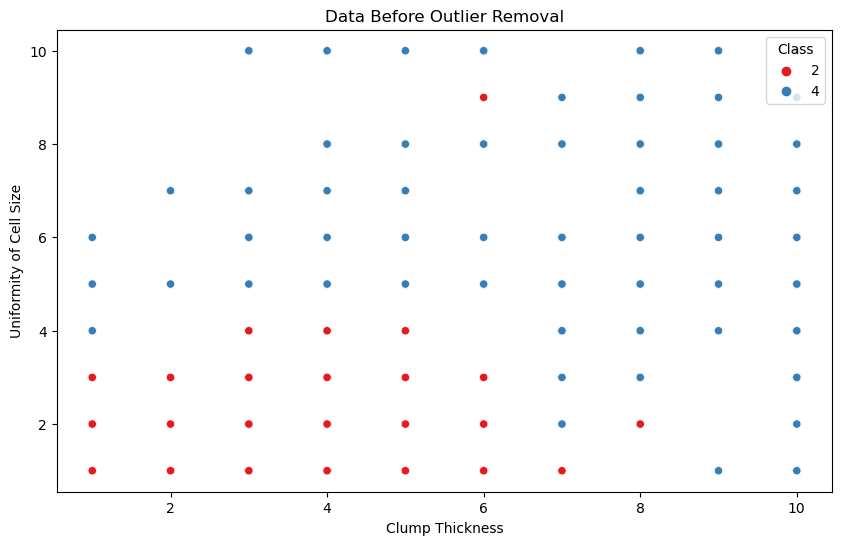

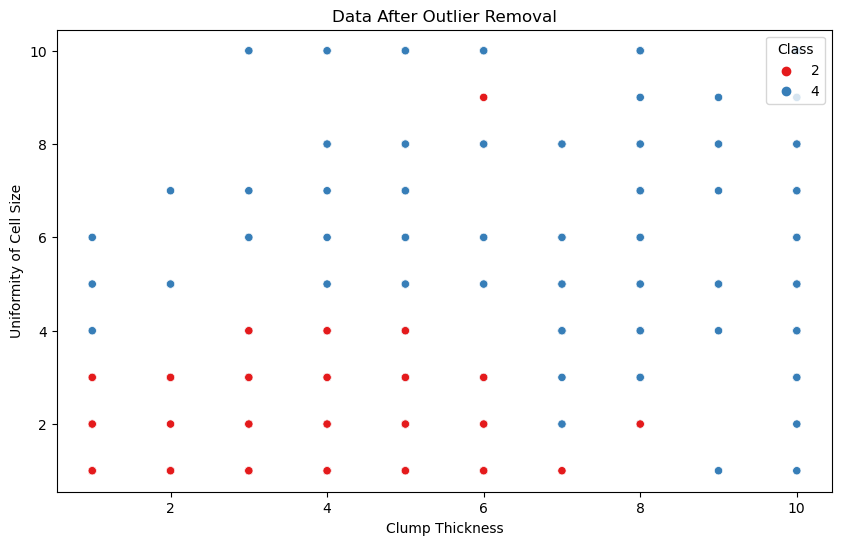

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
# Function to visualize data using scatter plot
def visualize_data_points(data, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='Clump Thickness', y='Uniformity of Cell Size', hue='Class', palette='Set1')
    plt.title(title)
    plt.xlabel('Clump Thickness')
    plt.ylabel('Uniformity of Cell Size')
    plt.legend(title='Class', loc='upper right')
    plt.show()

# Function to remove outliers using Z-score
def remove_outliers_zscore(data):
    z_scores = np.abs(stats.zscore(data.select_dtypes(include=np.number)))
    threshold = 3
    data_cleaned = data[(z_scores < threshold).all(axis=1)]
    return data_cleaned

# Visualize data points before removing outliers
visualize_data_points(data, 'Data Before Outlier Removal')

# Remove outliers using Z-score
data_cleaned = remove_outliers_zscore(data)

# Visualize data points after removing outliers
visualize_data_points(data_cleaned, 'Data After Outlier Removal')

In [68]:
data = data.replace('?',np.nan)

In [69]:
data=data.astype(float)

In [70]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
1,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
2,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
3,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
4,1017122.0,8.0,10.0,10.0,8.0,7.0,10.0,9.0,7.0,1.0,4.0


In [71]:
data.shape

(682, 11)

In [72]:
#Data TransFormation
from sklearn.preprocessing import LabelEncoder
data['Class'].unique()

array([2., 4.])

In [73]:
data.loc[data['Class']==2,'Class']='Y'
data.loc[data['Class']==4,'Class']='N'

data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,Y
1,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,Y
2,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,Y
3,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,Y
4,1017122.0,8.0,10.0,10.0,8.0,7.0,10.0,9.0,7.0,1.0,N


In [74]:
le = LabelEncoder()
le.fit(data['Class'])
le.classes_

array(['N', 'Y'], dtype=object)

In [75]:
data['Class'] = le.transform(data['Class'])

In [76]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,1
1,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,1
2,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,1
3,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,1
4,1017122.0,8.0,10.0,10.0,8.0,7.0,10.0,9.0,7.0,1.0,0


In [77]:
# Standardize the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned.select_dtypes(include=np.number))
data_scaled = pd.DataFrame(data_scaled, columns=data_cleaned.select_dtypes(include=np.number).columns)

In [78]:
print(data)

     Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1002945.0              5.0                      4.0   
1             1015425.0              3.0                      1.0   
2             1016277.0              6.0                      8.0   
3             1017023.0              4.0                      1.0   
4             1017122.0              8.0                     10.0   
..                  ...              ...                      ...   
693            776715.0              3.0                      1.0   
694            841769.0              2.0                      1.0   
695            888820.0              5.0                     10.0   
696            897471.0              4.0                      8.0   
697            897471.0              4.0                      8.0   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         4.0                5.0                          7.0   
1        

In [79]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
data_minmax = min_max_scaler.fit_transform(data_cleaned.select_dtypes(include=np.number))
data_minmax = pd.DataFrame(data_minmax, columns=data_cleaned.select_dtypes(include=np.number).columns)


In [80]:
# Remove '?' values
data = data[data != '?'].dropna()

In [81]:
print(data)


     Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1002945.0              5.0                      4.0   
1             1015425.0              3.0                      1.0   
2             1016277.0              6.0                      8.0   
3             1017023.0              4.0                      1.0   
4             1017122.0              8.0                     10.0   
..                  ...              ...                      ...   
693            776715.0              3.0                      1.0   
694            841769.0              2.0                      1.0   
695            888820.0              5.0                     10.0   
696            897471.0              4.0                      8.0   
697            897471.0              4.0                      8.0   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         4.0                5.0                          7.0   
1        

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming you have already defined data_scaled and data_cleaned

# Splitting the data into training and testing sets
X = data_scaled.drop('Class', axis=1)
y = data_cleaned['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_accuracy = lr_model.score(X_test, y_test)

# Build Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_accuracy = nb_model.score(X_test, y_test)

# Build Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_accuracy = gb_model.score(X_test, y_test)

# Compare Accuracy
print("Accuracy of Logistic Regression Model:", lr_accuracy)
print("Accuracy of Naïve Bayes Model:", nb_accuracy)
print("Accuracy of Gradient Boosting Model:", gb_accuracy)


Accuracy of Logistic Regression Model: 0.9444444444444444
Accuracy of Naïve Bayes Model: 0.9761904761904762
Accuracy of Gradient Boosting Model: 0.9682539682539683


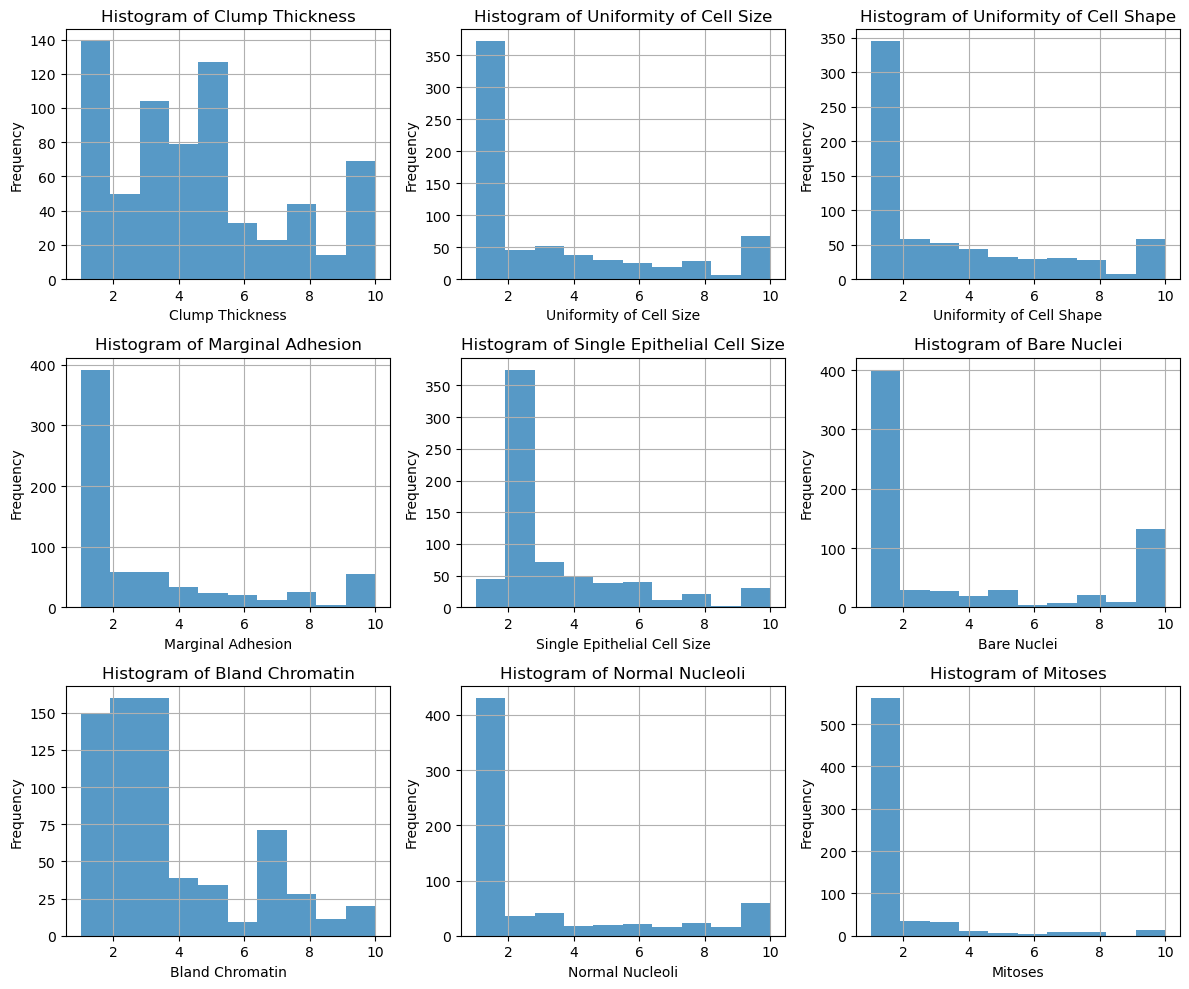

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is stored in a DataFrame named 'df'
# Replace 'data.csv' with the actual path to your data file if it's in a CSV format
# df = pd.read_csv('data.csv')

# If the 'Bare Nuclei' column contains non-numeric values such as '?', convert them to NaN
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei'], errors='coerce')

# Remove rows with missing values (NaNs)
data.dropna(inplace=True)

# Selecting only numeric columns for histogram
numeric_columns = data.drop(columns=['Sample code number', 'Class'])

# Plot histograms for each numeric column
plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(3, 3, i + 1)
    data[col].hist(bins=10, alpha=0.75)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


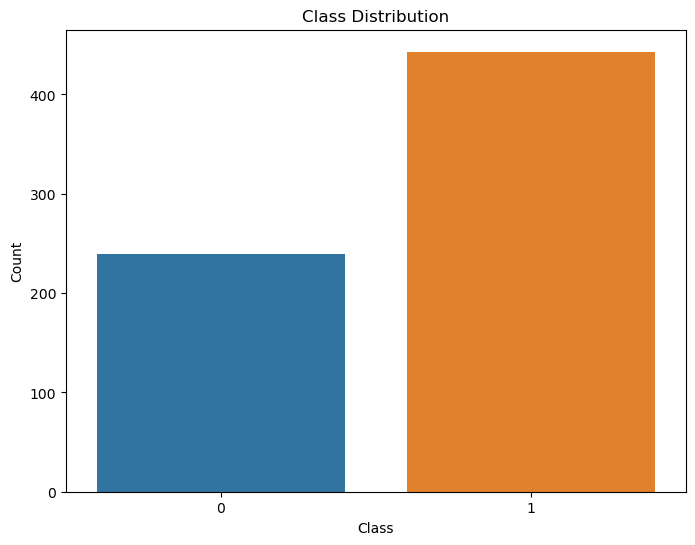

In [85]:
import seaborn as sns

# Bar graph for class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

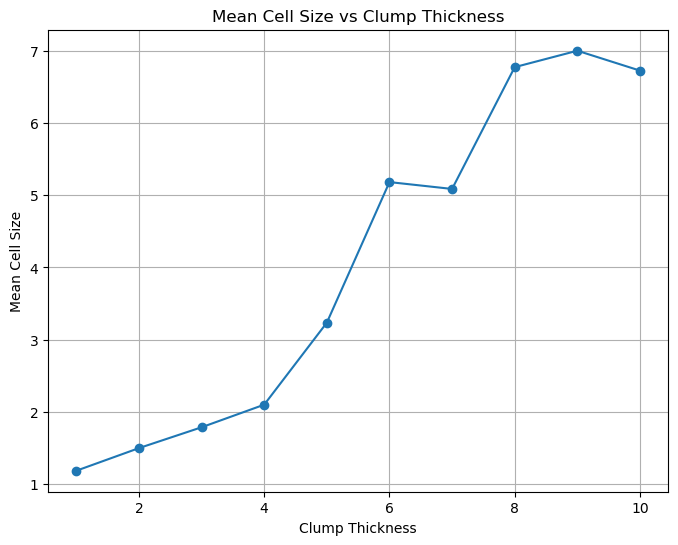

In [86]:
# Grouping data by Clump Thickness and calculating mean cell size
mean_cell_size = data.groupby('Clump Thickness')['Uniformity of Cell Size'].mean()

# Line plot
plt.figure(figsize=(8, 6))
mean_cell_size.plot(marker='o')
plt.title('Mean Cell Size vs Clump Thickness')
plt.xlabel('Clump Thickness')
plt.ylabel('Mean Cell Size')
plt.grid(True)
plt.show()


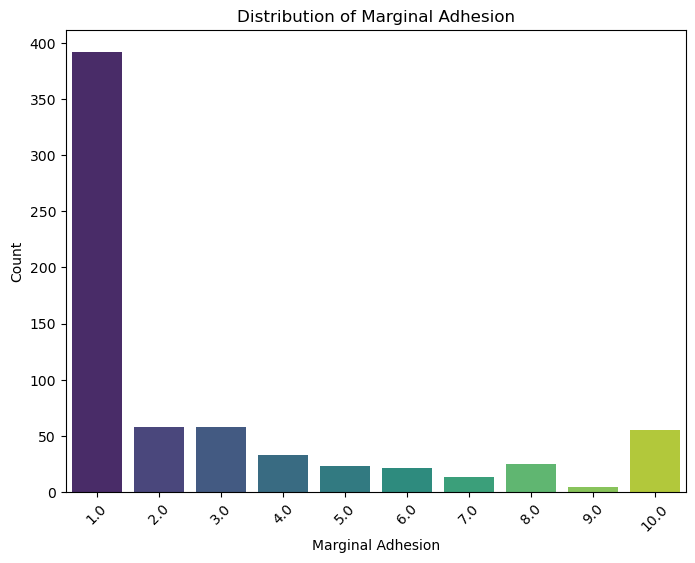

In [87]:
# Bar graph for distribution of Marginal Adhesion
plt.figure(figsize=(8, 6))
sns.countplot(x='Marginal Adhesion', data=data, palette='viridis')
plt.title('Distribution of Marginal Adhesion')
plt.xlabel('Marginal Adhesion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
